# Production demand patterns
*This notebook illustrates methods to explore the demand patterns of a set of parts.*  
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano 2020

### Import packages

In [11]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe

#import utilities
from logproj.utilities import creaCartella

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [4]:
# %% import data
from logproj.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=2500, num_parts = 100)


In [6]:
#print nodes dataframe
display(HTML(D_mov.head().to_html()))

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,9,NODE_9,41.845392,14.739318,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:48:00.722898,2020-01-02 01:08:02.854602,3,NODE_3,41.840934,14.029557,2020-01-02 21:03:38.121079,2020-01-02 22:03:38.121079,2020-01-02 21:11:35.760495,2020-01-02 22:05:52.861864,65,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,1.076042,2019-12-24 15:31:56.521260,TEU CONTAINER,USER_0
0,21,NODE_21,41.528971,14.969752,2020-01-03 00:24:42.983959,2020-01-03 01:24:42.983959,2020-01-03 00:44:00.758088,2020-01-03 01:15:21.330825,3,NODE_3,41.840934,14.029557,2020-01-04 05:28:37.751013,2020-01-04 06:28:37.751013,2020-01-04 05:17:15.074000,2020-01-04 06:40:12.948972,89,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,5.166790,2019-12-05 15:10:13.869492,TEU CONTAINER,USER_6
0,3,NODE_3,41.840934,14.029557,2020-01-04 07:37:40.285409,2020-01-04 08:37:40.285409,2020-01-04 07:23:36.494315,2020-01-04 08:48:17.820835,15,NODE_15,41.732713,14.465664,2020-01-04 16:38:04.473836,2020-01-04 17:38:04.473836,2020-01-04 16:24:57.508541,2020-01-04 18:08:12.162449,48,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,1.655524,2019-12-31 13:13:03.087426,FEU CONTAINER,USER_2
0,22,NODE_22,41.711571,14.992303,2020-01-05 00:05:06.931083,2020-01-05 01:05:06.931083,2020-01-04 23:58:16.602785,2020-01-05 01:19:57.311278,0,NODE_0,41.535813,14.370158,2020-01-05 12:05:03.228367,2020-01-05 13:05:03.228367,2020-01-05 11:40:33.091177,2020-01-05 12:47:57.275127,78,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,4.259778,2020-01-04 18:18:08.413786,TEU CONTAINER,USER_6
0,21,NODE_21,41.528971,14.969752,2020-01-05 16:13:38.333185,2020-01-05 17:13:38.333185,2020-01-05 16:04:07.225675,2020-01-05 17:40:48.556060,0,NODE_0,41.535813,14.370158,2020-01-06 00:55:42.518817,2020-01-06 01:55:42.518817,2020-01-06 00:56:03.861701,2020-01-06 01:32:55.911648,15,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,6.937719,2020-01-04 15:41:26.620318,FEU CONTAINER,USER_4


### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
_, root_path = creaCartella(pathResults,f"{string_casestudy}_results")
_, prediction_results_path = creaCartella(root_path,f"P9_predictions")

Cartella TOY_DATA_results già esistente


### Calculate ADI and CV2

In [17]:
itemfield='ITEMCODE' #column name with itemcode 
qtyfield = 'QUANTITY' #column name with quantity
dateVar = 'TIMESTAMP_IN'

def calculateADICV2(D_mov, itemfield, qtyfield, dateVar)
    #identify the number of days of the input dataset
    N_Days=max(D_mov[dateVar])-min(D_mov[dateVar])
    N_Days=N_Days.days

    D_demandPatterns = pd.DataFrame(columns = ['ITEMCODE','ADI','CV2'])
    for item in set(D_mov[itemfield]):
                #item='17092774'
                df_filtered=D_mov[D_mov[itemfield]==item]
                CV2=(np.std(df_filtered[qtyfield])/np.mean(df_filtered[qtyfield]))**2

                #ADI in days
                df_filtered=df_filtered.sort_values(by=dateVar)
                ADI=len(df_filtered)/N_Days
                D_demandPatterns = D_demandPatterns.append(pd.DataFrame([[item, ADI,CV2]],columns=D_demandPatterns.columns))
    return D_demandPatterns
D_demandPatterns = calculateADICV2(D_mov, itemfield, qtyfield, dateVar)
    

In [23]:
#print demand patterns dataframe
display(HTML(D_demandPatterns.head().to_html()))

,ITEMCODE,ADI,CV2,frequency
0,0,0.018827,0.132560,1
0,1,0.015062,0.240670,1
0,2,0.011296,0.153792,1
0,3,0.011834,0.167010,1
0,4,0.013986,0.232690,1


### Plot demand patterns

In [22]:
#set the relative importance of each part
D_demandPatterns['frequency']=1

(<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 0,
 100,
 0,
 0)

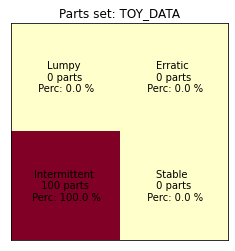

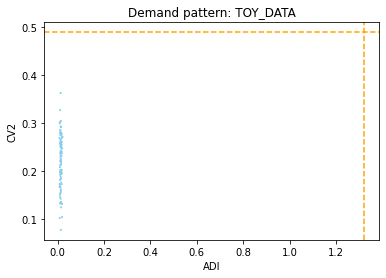

In [25]:
from logproj.P1_familyProblem.part_classification import demandPatternADICV2
demandPatternADICV2(D_demandPatterns, string_casestudy, draw=True)